In [1]:
import tensorflow.keras as keras
import tensorflow as tf

print(tf.__version__)

E:\ProgramData\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

<Figure size 640x480 with 1 Axes>

In [23]:
print(y_train.shape)
print(x_train.shape)

(60000,)
(60000, 28, 28)


In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

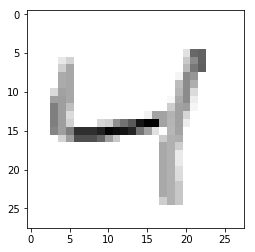

In [17]:
plt.imshow(x_train[2],cmap=plt.cm.binary)
plt.show()

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
config = tf.ConfigProto( device_count = {'GPU': 1})
sess = tf.Session(config=config)
tf.keras.backend.set_session(sess)

In [8]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 6s 103us/step - loss: 0.2634 - acc: 0.9226
Epoch 2/3
60000/60000 [==============================] - 6s 95us/step - loss: 0.1094 - acc: 0.9662
Epoch 3/3
60000/60000 [==============================] - 6s 92us/step - loss: 0.0719 - acc: 0.9772


In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 56us/step
0.09062557404832915
0.9718


In [11]:
predictions = model.predict(x_train)

In [16]:
import numpy as np

print(np.argmax(predictions[2]))

4
